1. What are the games that have the most sales in the world and in each sales region(North America, Europe, Japan, and others)  
2. What are the most popular platforms in the world and each sales region(North America, Europe, Japan, and others)
3. What are the least popular platforms in the world and each sales region(North America, Europe, Japan, and others)
4. What year has the most profitable in the game industry
5. What year has been the least profitable in the game’s industry
6. What are the most popular genres in the world and each sales region(North America, Europe, Japan, and others)
7. What are the least popular gender in the world and each sales region(North America, Europe, Japan, and others)
8. What is the most active publisher producing one game (most profitable publisher)
9. Which sales region has the most profitable according to the dataset columns
10. Which sales region has the least profitable according to the dataset columns.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def plot_bar_chart(labels, values, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend(["Sales"])

    plt.show()


In [55]:
# 读取数据
file_fn = 'vgsales.csv'
df = pd.read_csv(file_fn)


# 数据预处理，将年份转换为整数类型
df['Year'] = df['Year'].astype('Int64')

# 打印数据的描述
pd.set_option('display.width', 1000)
print(df.describe())


               Rank         Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16598.000000      16327.0  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000
mean    8300.605254  2006.406443      0.264667      0.146652      0.077782      0.048063      0.537441
std     4791.853933     5.828981      0.816683      0.505351      0.309291      0.188588      1.555028
min        1.000000       1980.0      0.000000      0.000000      0.000000      0.000000      0.010000
25%     4151.250000       2003.0      0.000000      0.000000      0.000000      0.000000      0.060000
50%     8300.500000       2007.0      0.080000      0.020000      0.000000      0.010000      0.170000
75%    12449.750000       2010.0      0.240000      0.110000      0.040000      0.040000      0.470000
max    16600.000000       2020.0     41.490000     29.020000     10.220000     10.570000     82.740000


In [56]:
global_top_game = df.loc[df['Global_Sales'].idxmax()]

print("全球销量最高的游戏:")
print(f"{global_top_game['Name']}, 销量 = {global_top_game['Global_Sales']}")
print("\n")

na_top_game = df.loc[df['NA_Sales'].idxmax()]
eu_top_game = df.loc[df['EU_Sales'].idxmax()]
jp_top_game = df.loc[df['JP_Sales'].idxmax()]
other_top_game = df.loc[df['Other_Sales'].idxmax()]


print("北美销量最高的游戏:")
print(f"{na_top_game['Name']}, 销量 = {na_top_game['NA_Sales']}")
print("\n")

print("欧洲销量最高的游戏:")
print(f"{eu_top_game['Name']}, 销量 = {eu_top_game['EU_Sales']}")
print("\n")

print("日本销量最高的游戏:")
print(f"{jp_top_game['Name']}, 销量 = {jp_top_game['JP_Sales']}")
print("\n")

print("其他地区销量最高的游戏:")
print(f"{other_top_game['Name']}, 销量 = {other_top_game['Other_Sales']}")
print("\n")



全球销量最高的游戏:
Wii Sports, 销量 = 82.74


北美销量最高的游戏:
Wii Sports, 销量 = 41.49


欧洲销量最高的游戏:
Wii Sports, 销量 = 29.02


日本销量最高的游戏:
Pokemon Red/Pokemon Blue, 销量 = 10.22


其他地区销量最高的游戏:
Grand Theft Auto: San Andreas, 销量 = 10.57




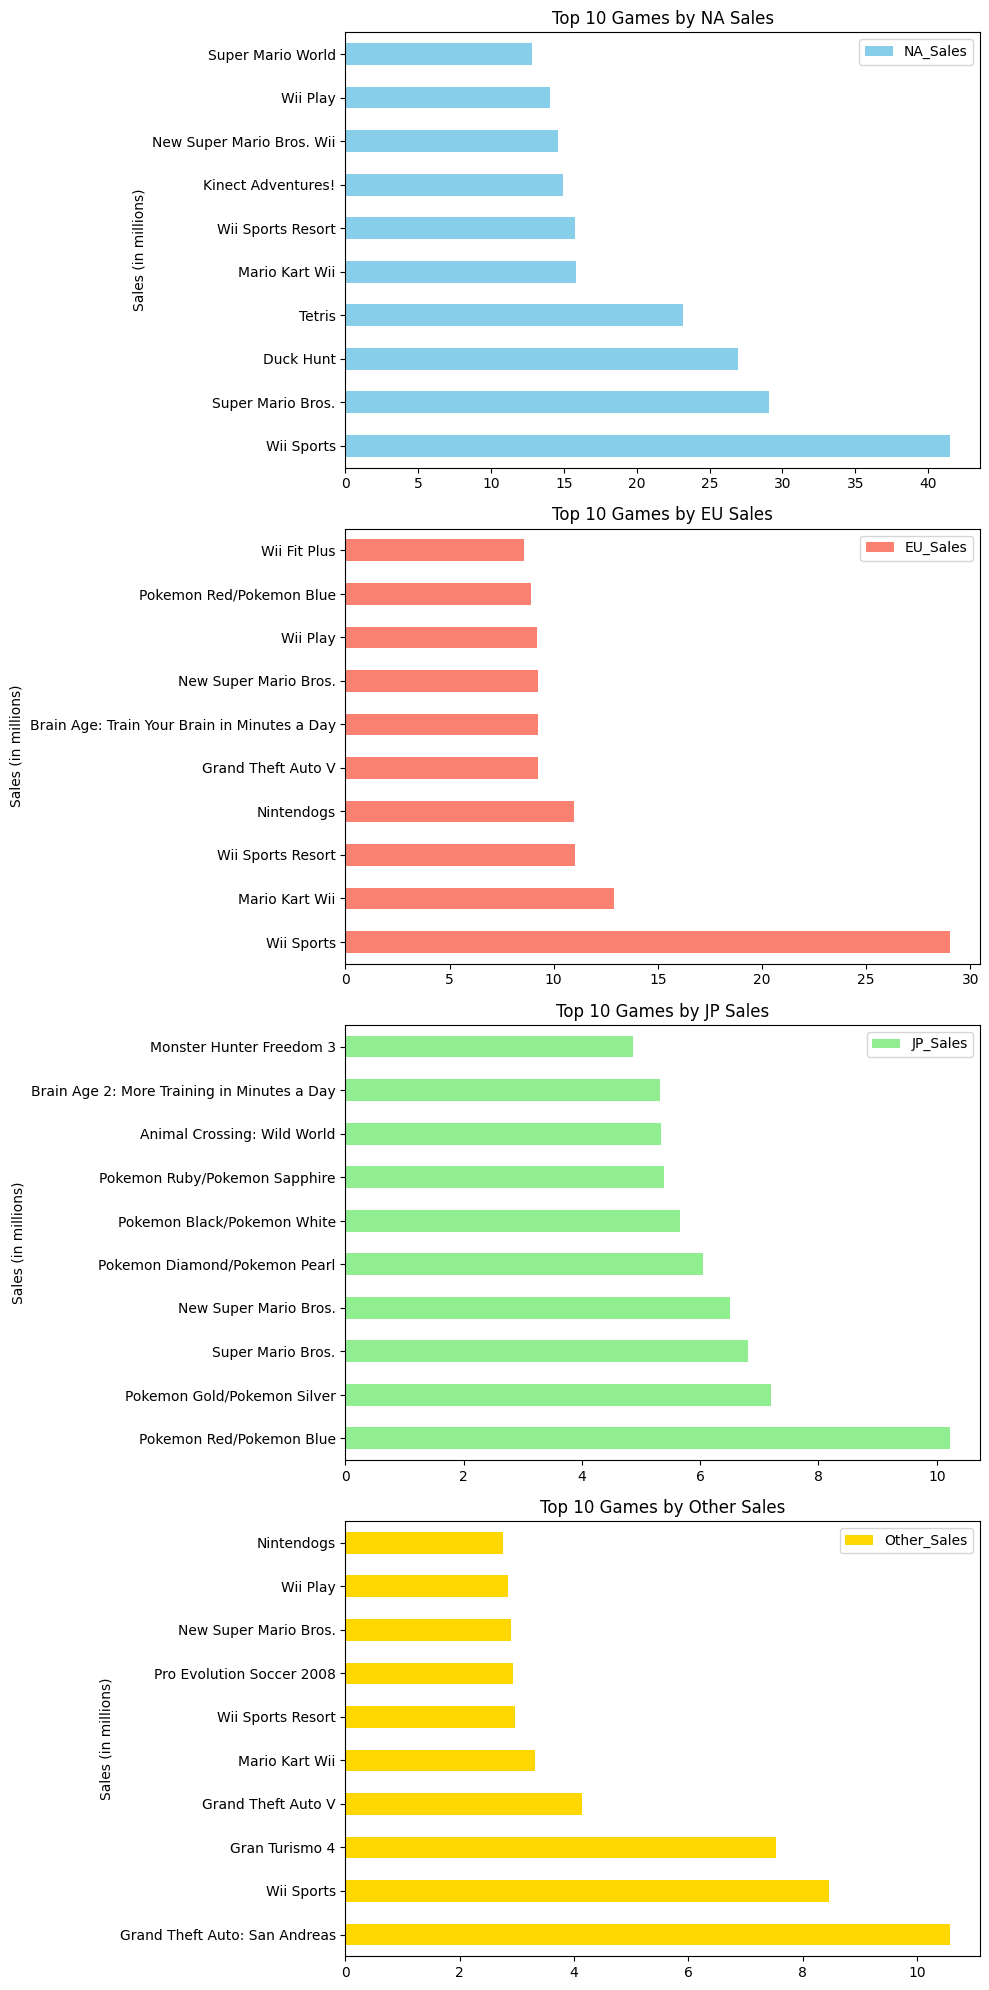

In [57]:

na_top_10 = df.nlargest(10, 'NA_Sales')
eu_top_10 = df.nlargest(10, 'EU_Sales')
jp_top_10 = df.nlargest(10, 'JP_Sales')
other_top_10 = df.nlargest(10, 'Other_Sales')

fig, axes = plt.subplots(4, 1, figsize=(10, 20))

na_top_10.plot(kind='barh', x='Name', y='NA_Sales', ax=axes[0], color='skyblue')
eu_top_10.plot(kind='barh', x='Name', y='EU_Sales', ax=axes[1], color='salmon')
jp_top_10.plot(kind='barh', x='Name', y='JP_Sales', ax=axes[2], color='lightgreen')
other_top_10.plot(kind='barh', x='Name', y='Other_Sales', ax=axes[3], color='gold')

axes[0].set_title('Top 10 Games by NA Sales')
axes[0].set_ylabel('Sales (in millions)')
axes[0].set_xlabel('')
axes[1].set_title('Top 10 Games by EU Sales')
axes[1].set_ylabel('Sales (in millions)')
axes[1].set_xlabel('')
axes[2].set_title('Top 10 Games by JP Sales')
axes[2].set_ylabel('Sales (in millions)')
axes[2].set_xlabel('')
axes[3].set_title('Top 10 Games by Other Sales')
axes[3].set_ylabel('Sales (in millions)')
axes[3].set_xlabel('')

plt.tight_layout()
plt.show()

全球最受欢迎的平台: PS2
北美最受欢迎的平台: X360
欧洲最受欢迎的平台: PS3
日本最受欢迎的平台: DS
其他地区最受欢迎的平台: PS2


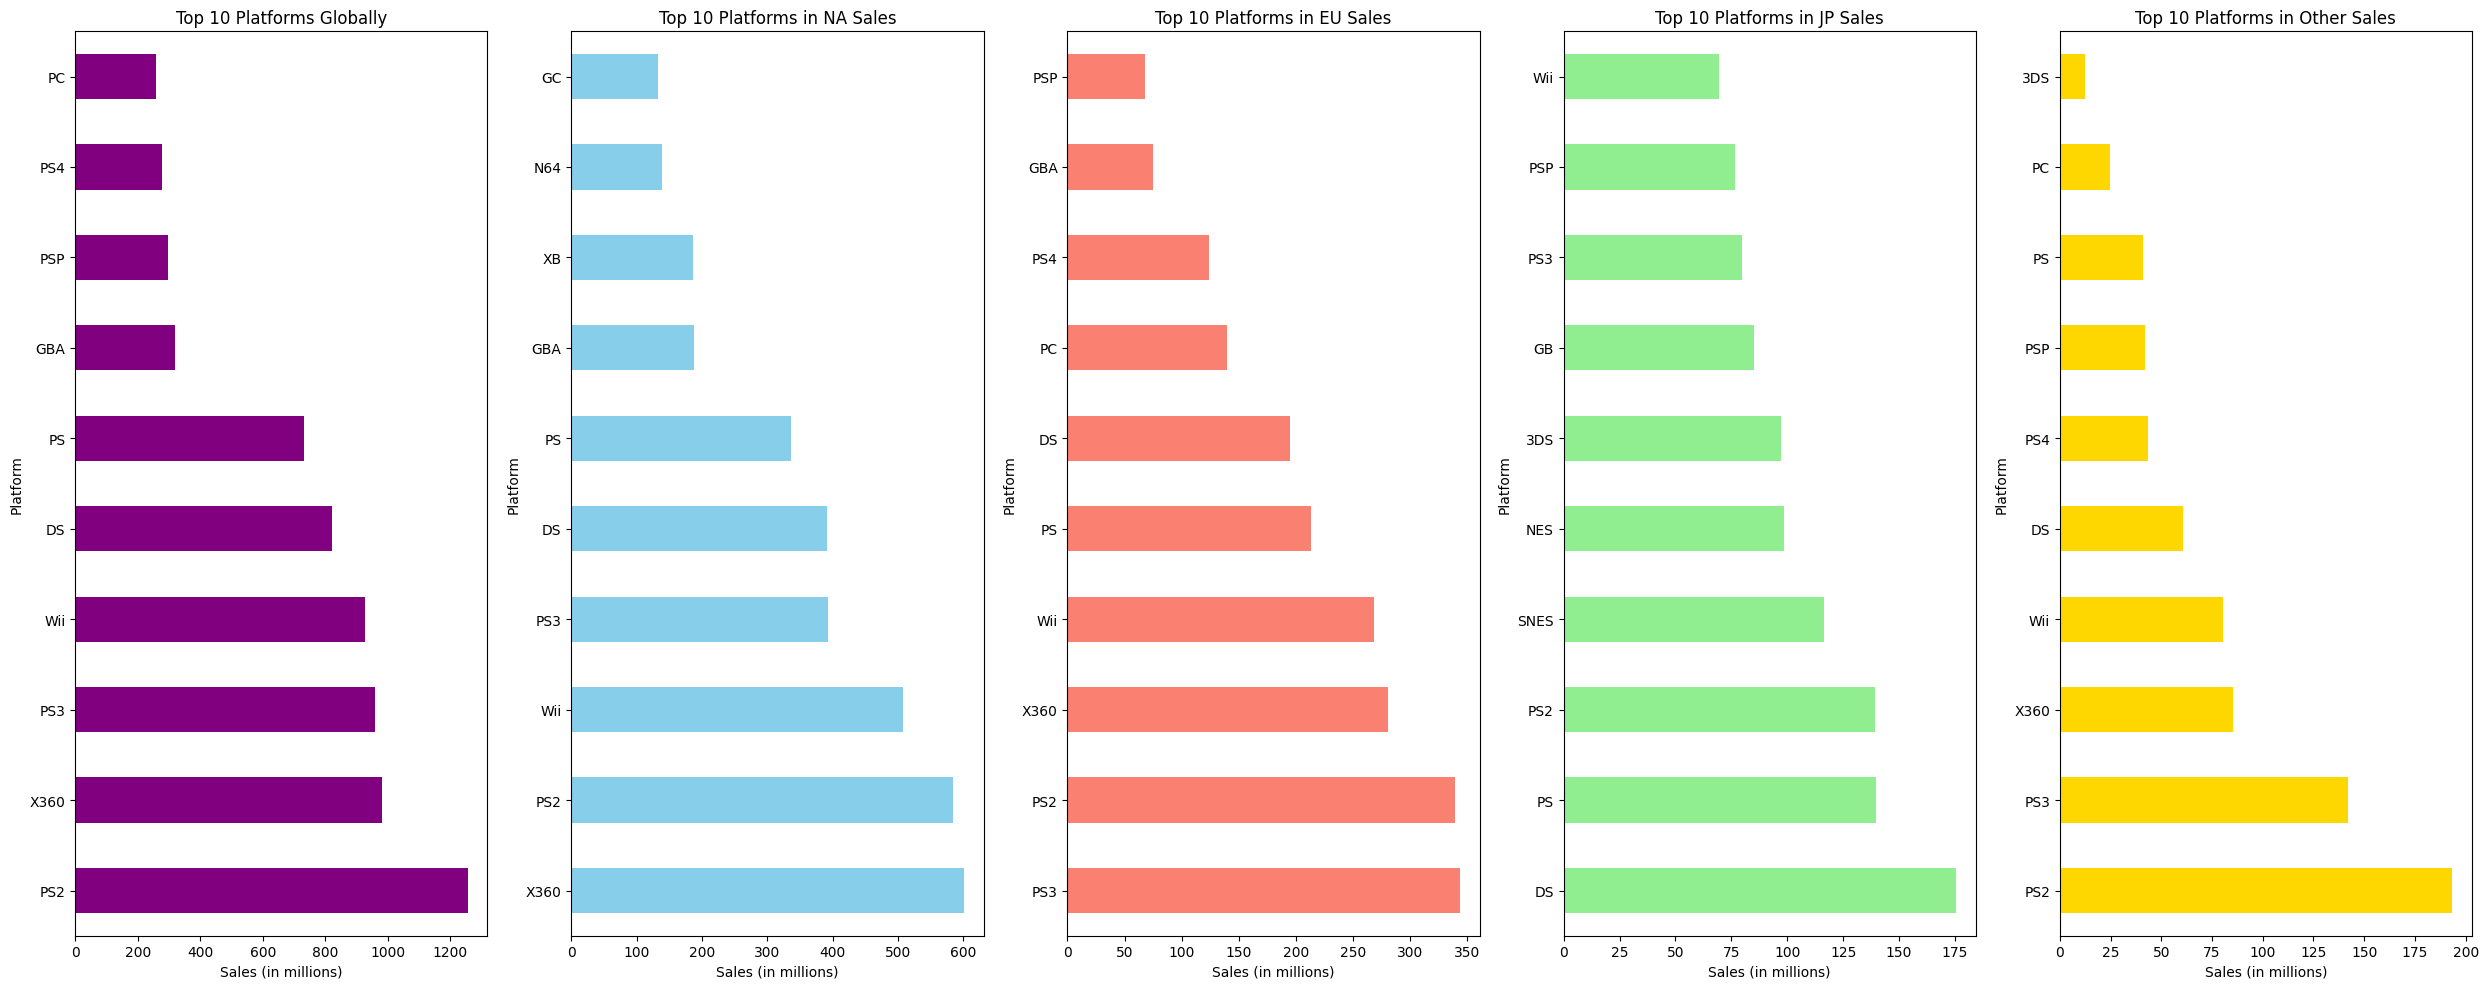

In [58]:

global_most_popular_platform = df.groupby('Platform')['Global_Sales'].sum().idxmax()
na_most_popular_platform = df.groupby('Platform')['NA_Sales'].sum().idxmax()
eu_most_popular_platform = df.groupby('Platform')['EU_Sales'].sum().idxmax()
jp_most_popular_platform = df.groupby('Platform')['JP_Sales'].sum().idxmax()
other_most_popular_platform = df.groupby('Platform')['Other_Sales'].sum().idxmax()

print("全球最受欢迎的平台:", global_most_popular_platform)
print("北美最受欢迎的平台:", na_most_popular_platform)
print("欧洲最受欢迎的平台:", eu_most_popular_platform)
print("日本最受欢迎的平台:", jp_most_popular_platform)
print("其他地区最受欢迎的平台:", other_most_popular_platform)


na_top_platforms = df.groupby('Platform')['NA_Sales'].sum().nlargest(10)
eu_top_platforms = df.groupby('Platform')['EU_Sales'].sum().nlargest(10)
jp_top_platforms = df.groupby('Platform')['JP_Sales'].sum().nlargest(10)
other_top_platforms = df.groupby('Platform')['Other_Sales'].sum().nlargest(10)
global_top_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(10)


fig, axes = plt.subplots(1, 5, figsize=(25, 10))


global_top_platforms.plot(kind='barh', ax=axes[0], color='purple')
axes[0].set_title('Top 10 Platforms Globally')
axes[0].set_xlabel('Sales (in millions)')
axes[0].set_ylabel('Platform')


na_top_platforms.plot(kind='barh', ax=axes[1], color='skyblue')
eu_top_platforms.plot(kind='barh', ax=axes[2], color='salmon')
jp_top_platforms.plot(kind='barh', ax=axes[3], color='lightgreen')
other_top_platforms.plot(kind='barh', ax=axes[4], color='gold')


axes[1].set_title('Top 10 Platforms in NA Sales')
axes[1].set_xlabel('Sales (in millions)')
axes[1].set_ylabel('Platform')
axes[2].set_title('Top 10 Platforms in EU Sales')
axes[2].set_xlabel('Sales (in millions)')
axes[2].set_ylabel('Platform')
axes[3].set_title('Top 10 Platforms in JP Sales')
axes[3].set_xlabel('Sales (in millions)')
axes[3].set_ylabel('Platform')
axes[4].set_title('Top 10 Platforms in Other Sales')
axes[4].set_xlabel('Sales (in millions)')
axes[4].set_ylabel('Platform')


plt.tight_layout()
plt.show()

全球最不受欢迎的平台: PCFX
北美最不受欢迎的平台: 3DO
欧洲最不受欢迎的平台: 3DO
日本最不受欢迎的平台: 2600
其他地区最不受欢迎的平台: 3DO


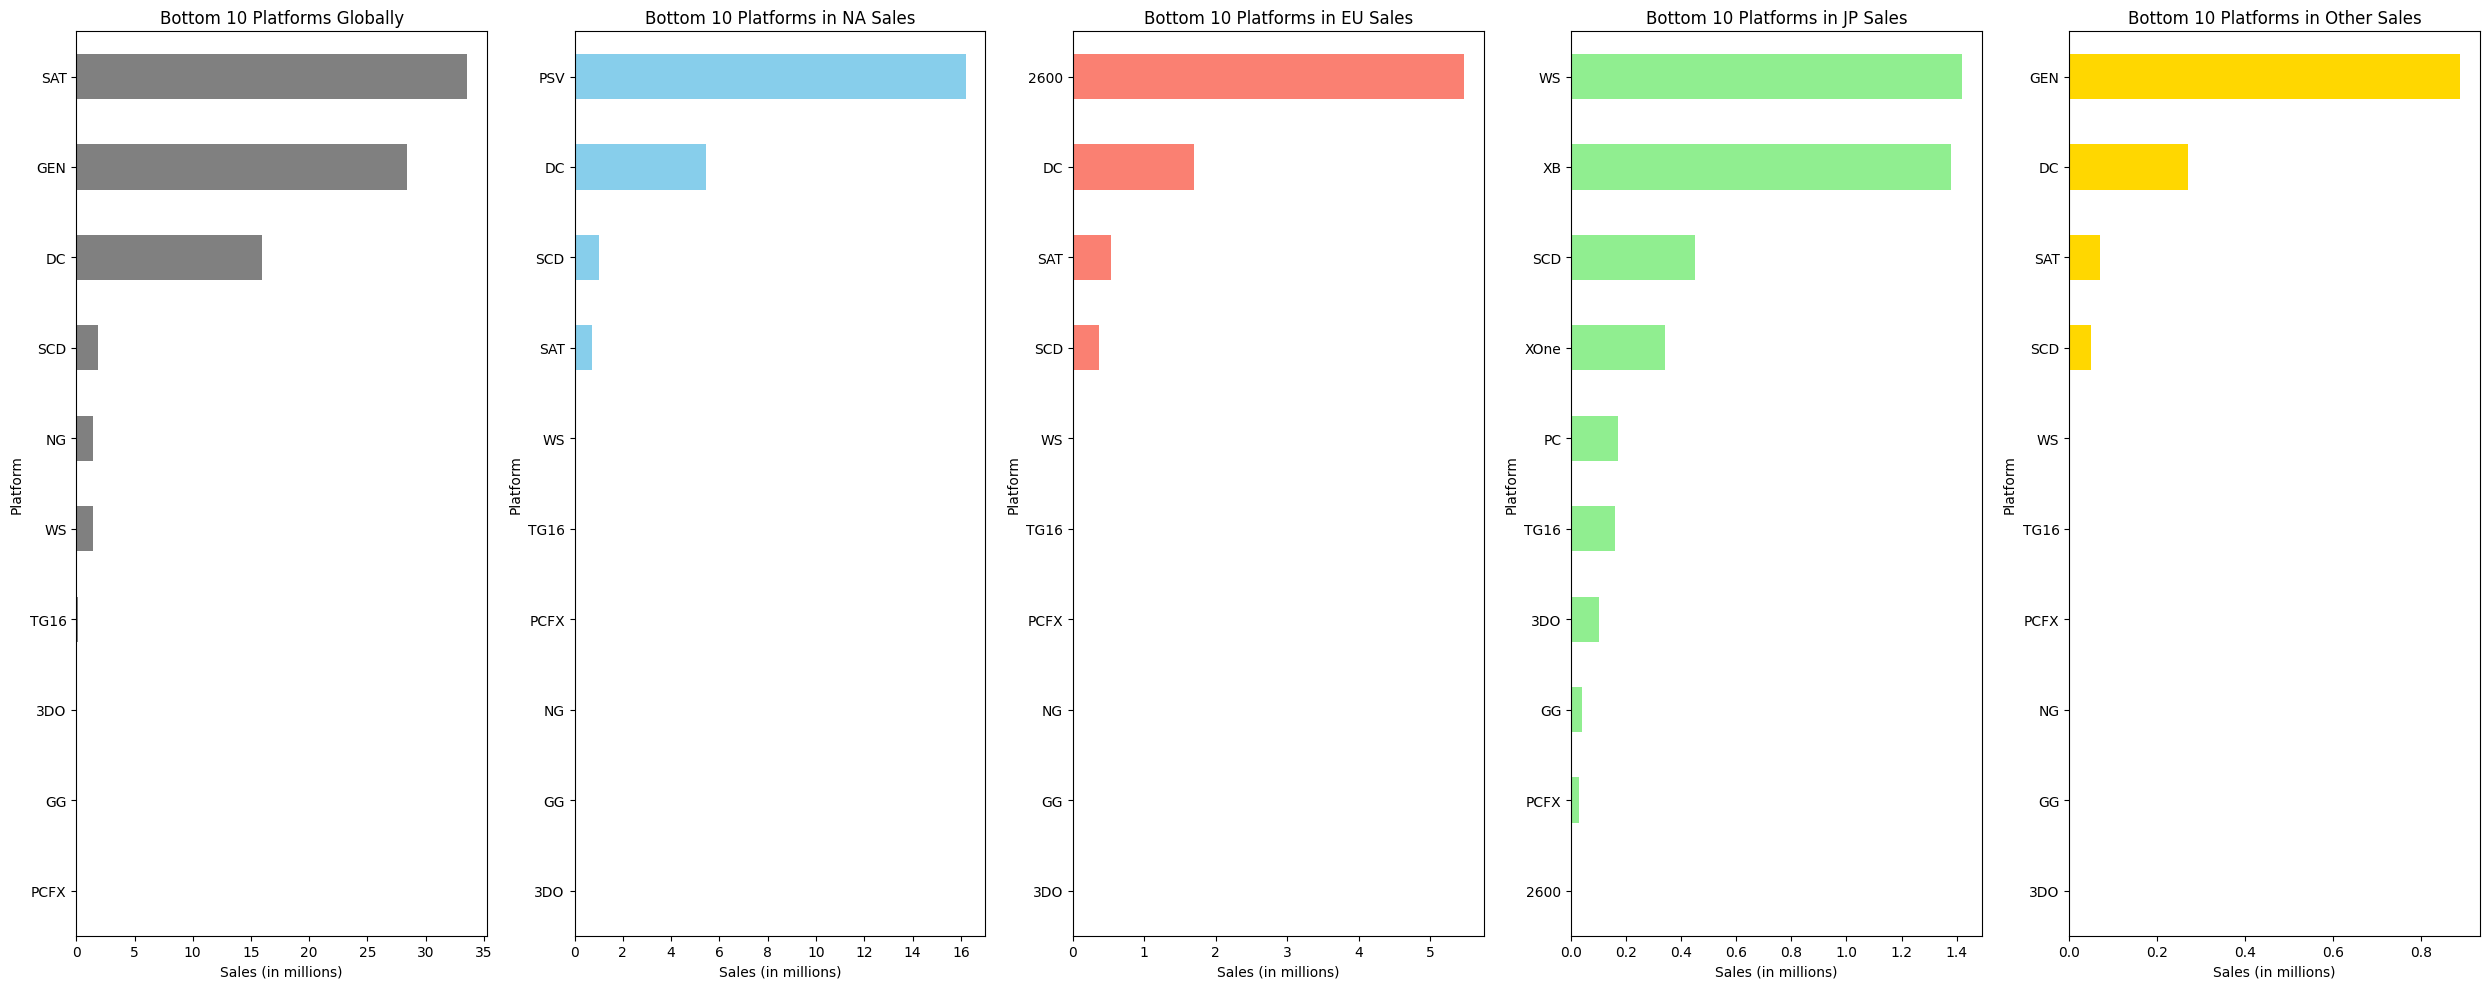

In [59]:


global_least_popular_platform = df.groupby('Platform')['Global_Sales'].sum().idxmin()
na_least_popular_platform = df.groupby('Platform')['NA_Sales'].sum().idxmin()
eu_least_popular_platform = df.groupby('Platform')['EU_Sales'].sum().idxmin()
jp_least_popular_platform = df.groupby('Platform')['JP_Sales'].sum().idxmin()
other_least_popular_platform = df.groupby('Platform')['Other_Sales'].sum().idxmin()

print("全球最不受欢迎的平台:", global_least_popular_platform)
print("北美最不受欢迎的平台:", na_least_popular_platform)
print("欧洲最不受欢迎的平台:", eu_least_popular_platform)
print("日本最不受欢迎的平台:", jp_least_popular_platform)
print("其他地区最不受欢迎的平台:", other_least_popular_platform)


na_bottom_platforms = df.groupby('Platform')['NA_Sales'].sum().nsmallest(10)
eu_bottom_platforms = df.groupby('Platform')['EU_Sales'].sum().nsmallest(10)
jp_bottom_platforms = df.groupby('Platform')['JP_Sales'].sum().nsmallest(10)
other_bottom_platforms = df.groupby('Platform')['Other_Sales'].sum().nsmallest(10)
global_bottom_platforms = df.groupby('Platform')['Global_Sales'].sum().nsmallest(10)


fig, axes = plt.subplots(1, 5, figsize=(25, 10))


global_bottom_platforms.plot(kind='barh', ax=axes[0], color='gray')
axes[0].set_title('Bottom 10 Platforms Globally')
axes[0].set_xlabel('Sales (in millions)')
axes[0].set_ylabel('Platform')


na_bottom_platforms.plot(kind='barh', ax=axes[1], color='skyblue')
eu_bottom_platforms.plot(kind='barh', ax=axes[2], color='salmon')
jp_bottom_platforms.plot(kind='barh', ax=axes[3], color='lightgreen')
other_bottom_platforms.plot(kind='barh', ax=axes[4], color='gold')


axes[1].set_title('Bottom 10 Platforms in NA Sales')
axes[1].set_xlabel('Sales (in millions)')
axes[1].set_ylabel('Platform')
axes[2].set_title('Bottom 10 Platforms in EU Sales')
axes[2].set_xlabel('Sales (in millions)')
axes[2].set_ylabel('Platform')
axes[3].set_title('Bottom 10 Platforms in JP Sales')
axes[3].set_xlabel('Sales (in millions)')
axes[3].set_ylabel('Platform')
axes[4].set_title('Bottom 10 Platforms in Other Sales')
axes[4].set_xlabel('Sales (in millions)')
axes[4].set_ylabel('Platform')


plt.tight_layout()
plt.show()

全球最繁荣的年份: 2008
北美最繁荣的年份: 2008
欧洲最繁荣的年份: 2009
日本最繁荣的年份: 2006
其他地区最繁荣的年份: 2008


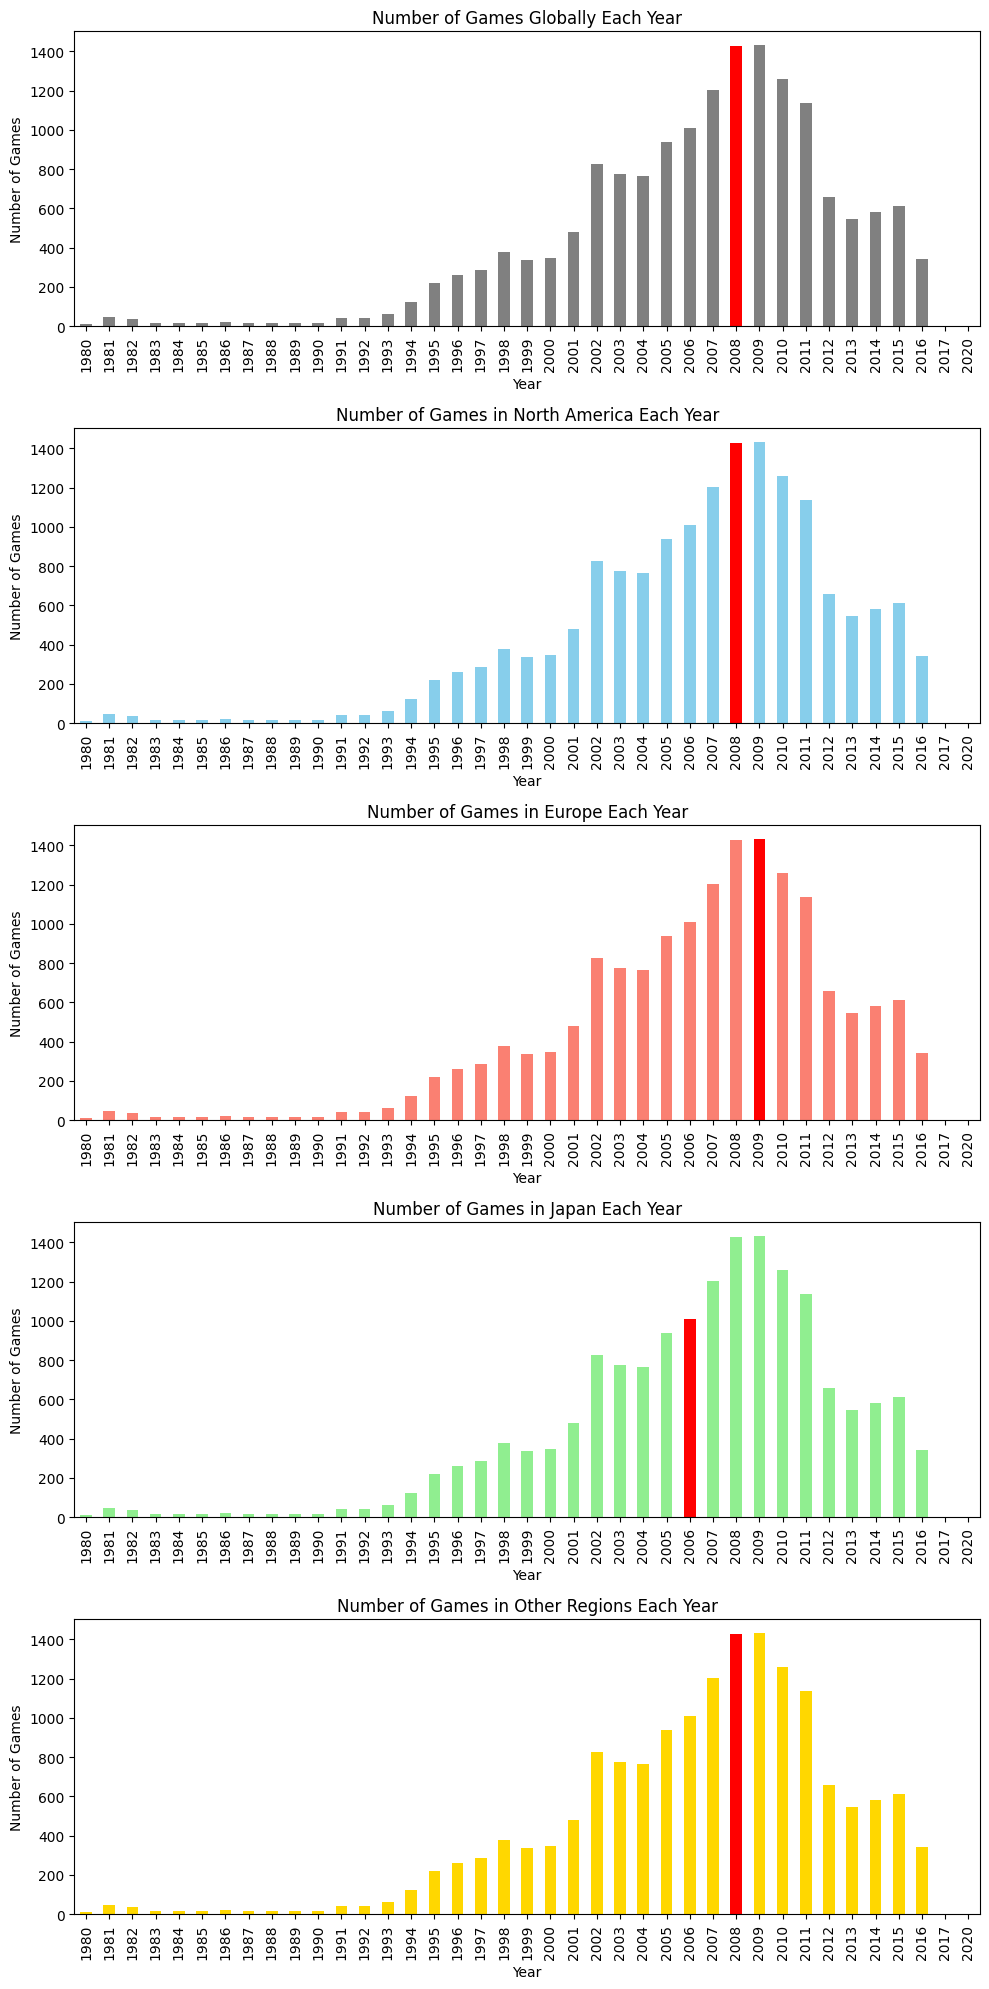

In [60]:

global_most_profitable_year = df.groupby('Year')['Global_Sales'].sum().idxmax()
na_most_profitable_year = df.groupby('Year')['NA_Sales'].sum().idxmax()
eu_most_profitable_year = df.groupby('Year')['EU_Sales'].sum().idxmax()
jp_most_profitable_year = df.groupby('Year')['JP_Sales'].sum().idxmax()
other_most_profitable_year = df.groupby('Year')['Other_Sales'].sum().idxmax()

print("全球最繁荣的年份:", global_most_profitable_year)
print("北美最繁荣的年份:", na_most_profitable_year)
print("欧洲最繁荣的年份:", eu_most_profitable_year)
print("日本最繁荣的年份:", jp_most_profitable_year)
print("其他地区最繁荣的年份:", other_most_profitable_year)


fig, axes = plt.subplots(5, 1, figsize=(10, 20))


global_game_counts = df.groupby('Year')['Global_Sales'].count()
global_game_counts.plot(kind='bar', ax=axes[0], color=['gray' if year != global_most_profitable_year else 'red' for year in global_game_counts.index])
axes[0].set_title('Number of Games Globally Each Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Games')


na_game_counts = df.groupby('Year')['NA_Sales'].count()
na_game_counts.plot(kind='bar', ax=axes[1], color=['skyblue' if year != na_most_profitable_year else 'red' for year in na_game_counts.index])
axes[1].set_title('Number of Games in North America Each Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Games')


eu_game_counts = df.groupby('Year')['EU_Sales'].count()
eu_game_counts.plot(kind='bar', ax=axes[2], color=['salmon' if year != eu_most_profitable_year else 'red' for year in eu_game_counts.index])
axes[2].set_title('Number of Games in Europe Each Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Games')


jp_game_counts = df.groupby('Year')['JP_Sales'].count()
jp_game_counts.plot(kind='bar', ax=axes[3], color=['lightgreen' if year != jp_most_profitable_year else 'red' for year in jp_game_counts.index])
axes[3].set_title('Number of Games in Japan Each Year')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Number of Games')


other_game_counts = df.groupby('Year')['Other_Sales'].count()
other_game_counts.plot(kind='bar', ax=axes[4], color=['gold' if year != other_most_profitable_year else 'red' for year in other_game_counts.index])
axes[4].set_title('Number of Games in Other Regions Each Year')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Number of Games')


plt.tight_layout()
plt.show()

全球最不繁荣的年份: 2017
北美最不繁荣的年份: 2020
欧洲最不繁荣的年份: 1980
日本最不繁荣的年份: 2017
其他地区最不繁荣的年份: 2020


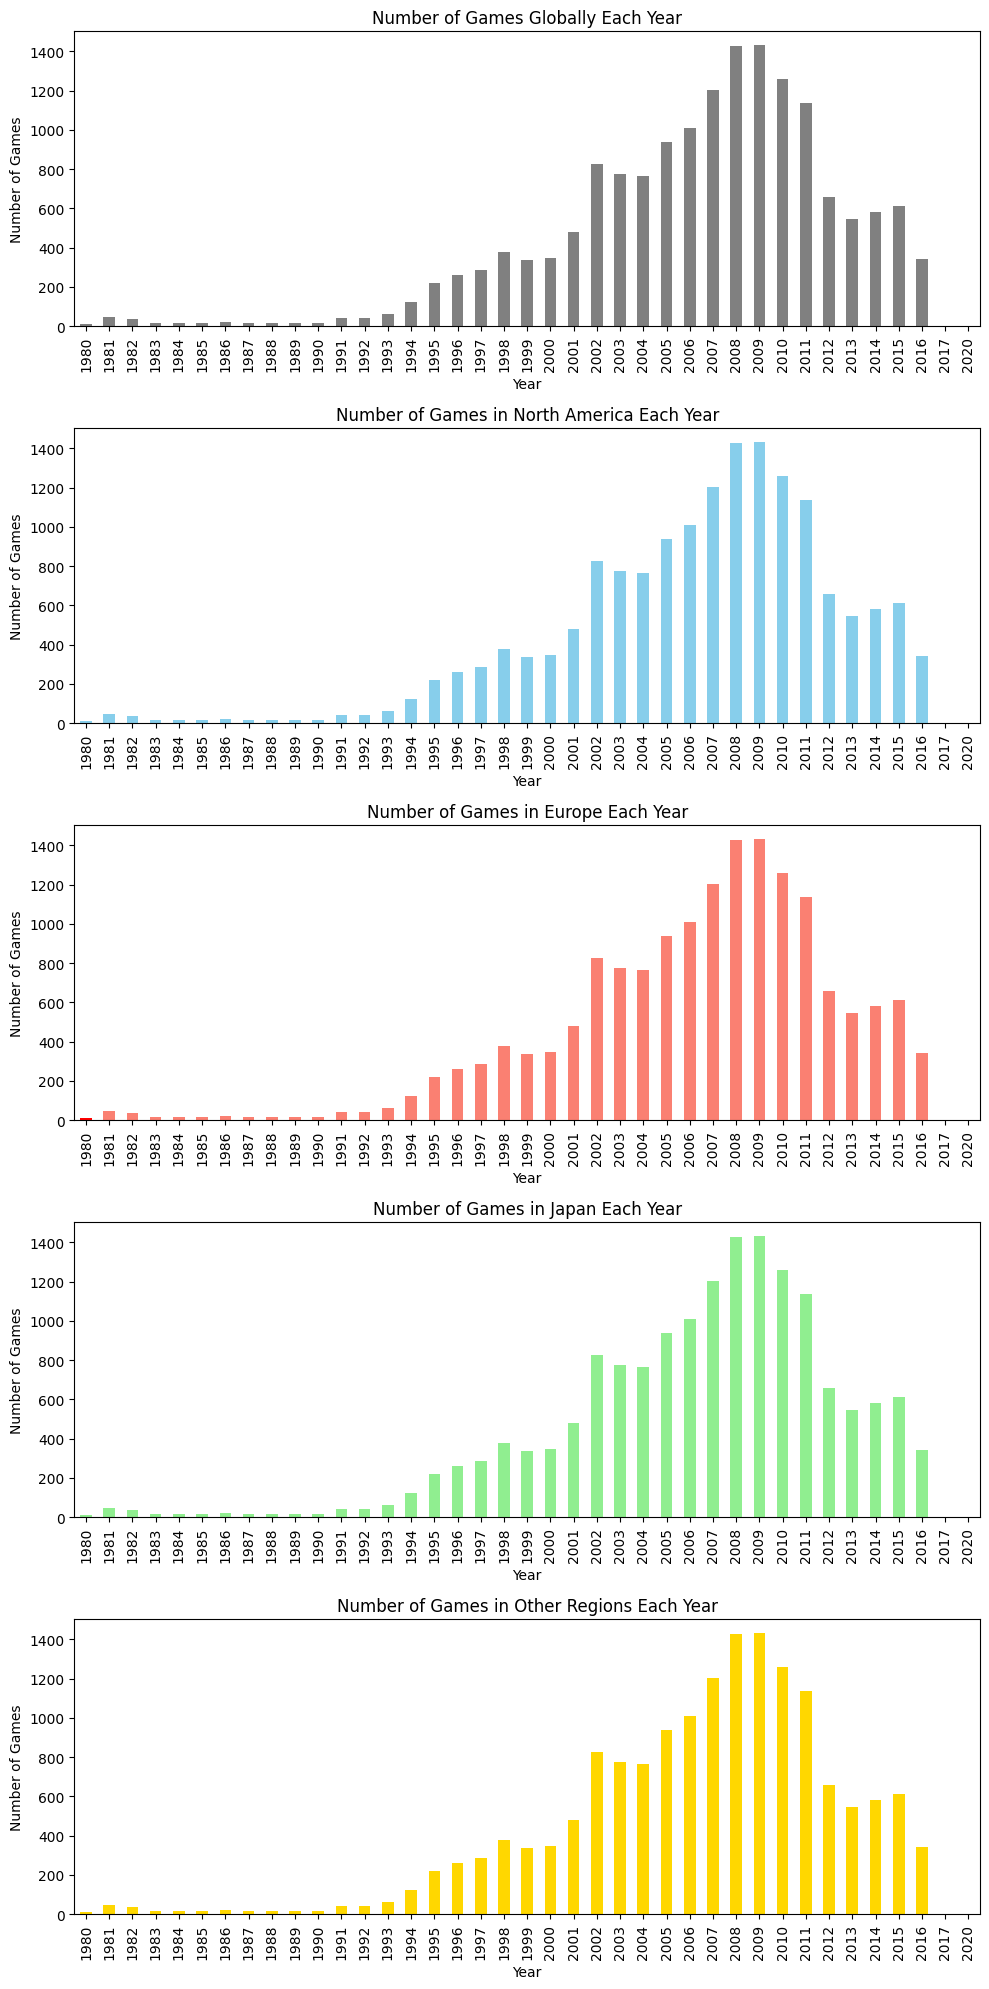

In [61]:

global_least_profitable_year = df[df['Global_Sales'] > 0].groupby('Year')['Global_Sales'].sum().idxmin()
na_least_profitable_year = df[df['NA_Sales'] > 0].groupby('Year')['NA_Sales'].sum().idxmin()
eu_least_profitable_year = df[df['EU_Sales'] > 0].groupby('Year')['EU_Sales'].sum().idxmin()
jp_least_profitable_year = df[df['JP_Sales'] > 0].groupby('Year')['JP_Sales'].sum().idxmin()
other_least_profitable_year = df[df['Other_Sales'] > 0].groupby('Year')['Other_Sales'].sum().idxmin()

print("全球最不繁荣的年份:", global_least_profitable_year)
print("北美最不繁荣的年份:", na_least_profitable_year)
print("欧洲最不繁荣的年份:", eu_least_profitable_year)
print("日本最不繁荣的年份:", jp_least_profitable_year)
print("其他地区最不繁荣的年份:", other_least_profitable_year)


fig, axes = plt.subplots(5, 1, figsize=(10, 20))


global_game_counts = df.groupby('Year')['Global_Sales'].count()
global_game_counts.plot(kind='bar', ax=axes[0], color=['gray' if year != global_least_profitable_year else 'red' for year in global_game_counts.index])
axes[0].set_title('Number of Games Globally Each Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Games')


na_game_counts = df.groupby('Year')['NA_Sales'].count()
na_game_counts.plot(kind='bar', ax=axes[1], color=['skyblue' if year != na_least_profitable_year else 'red' for year in na_game_counts.index])
axes[1].set_title('Number of Games in North America Each Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Games')


eu_game_counts = df.groupby('Year')['EU_Sales'].count()
eu_game_counts.plot(kind='bar', ax=axes[2], color=['salmon' if year != eu_least_profitable_year else 'red' for year in eu_game_counts.index])
axes[2].set_title('Number of Games in Europe Each Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Games')


jp_game_counts = df.groupby('Year')['JP_Sales'].count()
jp_game_counts.plot(kind='bar', ax=axes[3], color=['lightgreen' if year != jp_least_profitable_year else 'red' for year in jp_game_counts.index])
axes[3].set_title('Number of Games in Japan Each Year')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Number of Games')


other_game_counts = df.groupby('Year')['Other_Sales'].count()
other_game_counts.plot(kind='bar', ax=axes[4], color=['gold' if year != other_least_profitable_year else 'red' for year in other_game_counts.index])
axes[4].set_title('Number of Games in Other Regions Each Year')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Number of Games')


plt.tight_layout()
plt.show()